### 1. Load Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

### 2. Load the Dataset

In [2]:
# Load the CSV file
csv_path = r"https://github.com/Madhavan1232/Elective_ML_2/raw/refs/heads/main/PortalQuestions/Data/ML374_S6_Concept_Weather_Cleaned_Data.csv"
df = pd.read_csv(csv_path)

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (3654, 2)

First 5 rows:
   global_radiation  temperature
0         -1.208678    -1.095641
1         -1.155215    -1.001222
2         -0.887898    -1.190060
3         -0.748894    -0.960756
4         -0.877206    -0.677498

Column Names:
['global_radiation', 'temperature']

Data Types:
global_radiation    float64
temperature         float64
dtype: object

Missing Values:
global_radiation    0
temperature         0
dtype: int64

Basic Statistics:
       global_radiation   temperature
count      3.654000e+03  3.654000e+03
mean       3.694667e-17 -1.750105e-16
std        1.000137e+00  1.000137e+00
min       -1.369068e+00 -2.741234e+00
25%       -8.558203e-01 -7.719178e-01
50%       -2.356455e-01  5.087892e-02
75%        7.801581e-01  7.927448e-01
max        2.373366e+00  2.424850e+00


### 3. Prepare Data for Regression

In [3]:
# Extract features and target
# Assuming 'global_radiation' is the predictor and 'temperature' is the target
X = df[['global_radiation']].values
y = df['temperature'].values

print(f"Number of samples: {len(y)}")
print(f"Global Radiation - Min: {X.min():.2f}, Max: {X.max():.2f}, Mean: {X.mean():.2f}")
print(f"Temperature - Min: {y.min():.2f}, Max: {y.max():.2f}, Mean: {y.mean():.2f}")

Number of samples: 3654
Global Radiation - Min: -1.37, Max: 2.37, Mean: 0.00
Temperature - Min: -2.74, Max: 2.42, Mean: -0.00


### 4. Fit Linear Regression Model

In [4]:
# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Calculate performance metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Linear Regression Model Summary:")
print(f"Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"\nModel Performance:")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"\nRegression Equation:")
print(f"Temperature = {model.intercept_:.4f} + {model.coef_[0]:.4f} × Global_Radiation")

Linear Regression Model Summary:
Coefficient (slope): 0.7084
Intercept: -0.0000

Model Performance:
R-squared (R²): 0.5018
Mean Absolute Error (MAE): 0.5728
Mean Squared Error (MSE): 0.4982
Root Mean Squared Error (RMSE): 0.7058

Regression Equation:
Temperature = -0.0000 + 0.7084 × Global_Radiation


### 5. Scatter Plot with Line of Best Fit - Relationship Analysis

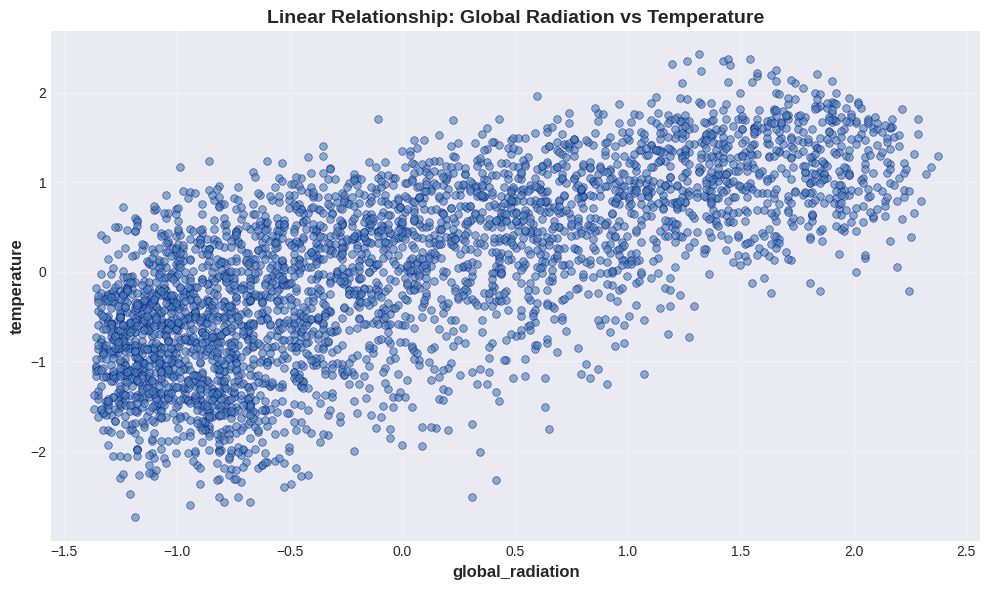

Plot 1: Scatter plot showing linear relationship between global radiation and temperature
Interpretation: The scatter plot reveals a positive linear relationship between
global radiation and temperature. The line of best fit (orange) represents the
predicted values. With R² = 0.5018, approximately 50.18% of the variance
in temperature is explained by global radiation.


In [13]:
# Create scatter plot with line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, s=30, color='steelblue', edgecolors='navy', linewidth=0.5)

# # Add line of best fit
# X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
# y_line = model.predict(X_line)
# plt.plot(X_line, y_line,  linewidth=2, label=f'Line of Best Fit\nR² = {r2:.4f}')

plt.xlabel('global_radiation', fontsize=12, fontweight='bold')
plt.ylabel('temperature', fontsize=12, fontweight='bold')
plt.title('Linear Relationship: Global Radiation vs Temperature', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Plot 1: Scatter plot showing linear relationship between global radiation and temperature")
print(f"Interpretation: The scatter plot reveals a positive linear relationship between")
print(f"global radiation and temperature. The line of best fit (orange) represents the")
print(f"predicted values. With R² = {r2:.4f}, approximately {r2*100:.2f}% of the variance")
print(f"in temperature is explained by global radiation.")

### 6. Residuals vs Fitted Values - Homoscedasticity Check

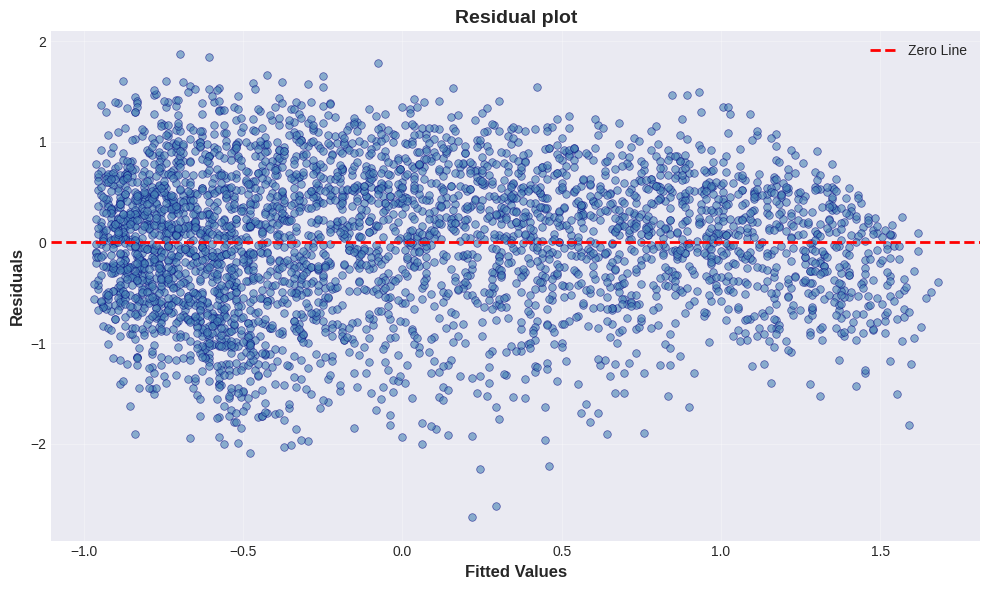

Plot 2: Residuals vs Fitted Values (Homoscedasticity Check)
Residual Statistics:
  Mean of Residuals: 0.000000 (should be close to 0)
  Std Dev of Residuals: 0.7058
  Min Residual: -2.7313
  Max Residual: 1.8676

Interpretation: The residual plot evaluates homoscedasticity (constant variance).
Ideally, residuals should be randomly scattered around the zero line without
any clear pattern. If the scatter widens or narrows (funnel shape), it suggests
heteroscedasticity, meaning the variance of errors is not constant.


In [6]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, s=30, color='steelblue', edgecolors='navy', linewidth=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Line')

plt.xlabel('Fitted Values', fontsize=12, fontweight='bold')
plt.ylabel('Residuals', fontsize=12, fontweight='bold')
plt.title('Residual plot', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Plot 2: Residuals vs Fitted Values (Homoscedasticity Check)")
print(f"Residual Statistics:")
print(f"  Mean of Residuals: {residuals.mean():.6f} (should be close to 0)")
print(f"  Std Dev of Residuals: {residuals.std():.4f}")
print(f"  Min Residual: {residuals.min():.4f}")
print(f"  Max Residual: {residuals.max():.4f}")
print(f"\nInterpretation: The residual plot evaluates homoscedasticity (constant variance).")
print(f"Ideally, residuals should be randomly scattered around the zero line without")
print(f"any clear pattern. If the scatter widens or narrows (funnel shape), it suggests")
print(f"heteroscedasticity, meaning the variance of errors is not constant.")

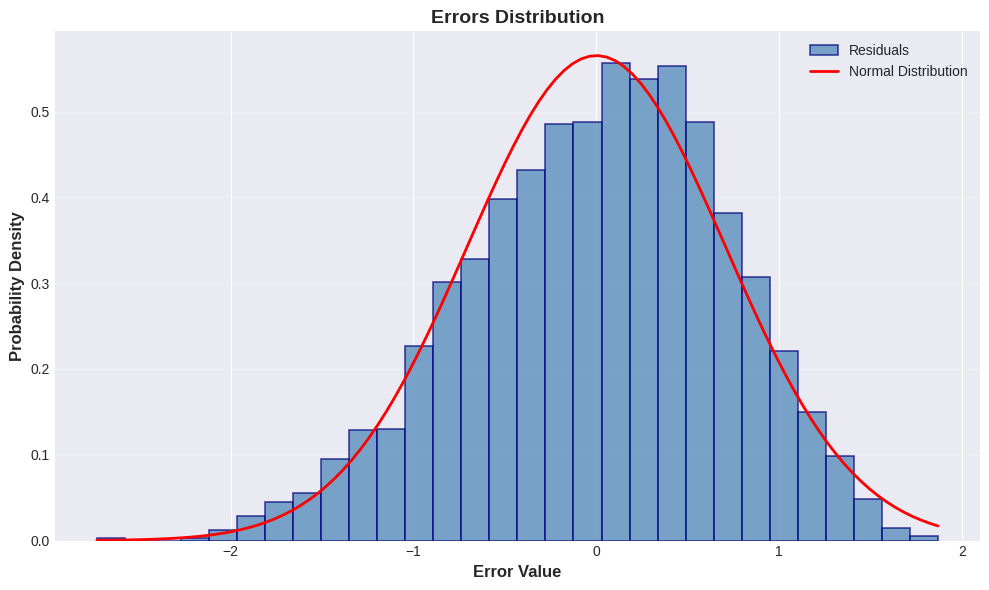

Plot 3: Histogram with Normal Distribution Curve (Normality Assessment)

Normality Test Results:
  Shapiro-Wilk Test Statistic: 0.9925
  Shapiro-Wilk P-value: 0.000000
  Normal Distribution Mean (μ): 0.0000
  Normal Distribution Std Dev (σ): 0.7058
  Conclusion: P-value (0.0000) ≤ 0.05 → Residuals deviate from NORMALITY

Interpretation: The histogram shows the distribution of regression errors.
The red curve overlaid is the theoretical normal distribution. If residuals
closely follow the normal curve, the normality assumption of linear regression is met.


In [7]:
# Plot histogram with normal distribution curve
plt.figure(figsize=(10, 6))

# Histogram
n, bins, patches = plt.hist(residuals, bins=30, density=True, alpha=0.7, 
                              color='steelblue', edgecolor='navy', linewidth=1.2, label='Residuals')

# Fit normal distribution
mu = residuals.mean()
sigma = residuals.std()
x = np.linspace(residuals.min(), residuals.max(), 100)
normal_dist = stats.norm.pdf(x, mu, sigma)

# Plot normal distribution curve
plt.plot(x, normal_dist, 'r-', linewidth=2, label='Normal Distribution')

plt.xlabel('Error Value', fontsize=12, fontweight='bold')
plt.ylabel('Probability Density', fontsize=12, fontweight='bold')
plt.title('Errors Distribution', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test for normality
shapiro_stat, shapiro_p = stats.shapiro(residuals)

print("Plot 3: Histogram with Normal Distribution Curve (Normality Assessment)")
print(f"\nNormality Test Results:")
print(f"  Shapiro-Wilk Test Statistic: {shapiro_stat:.4f}")
print(f"  Shapiro-Wilk P-value: {shapiro_p:.6f}")
print(f"  Normal Distribution Mean (μ): {mu:.4f}")
print(f"  Normal Distribution Std Dev (σ): {sigma:.4f}")
if shapiro_p > 0.05:
    print(f"  Conclusion: P-value ({shapiro_p:.4f}) > 0.05 → Residuals appear NORMAL")
else:
    print(f"  Conclusion: P-value ({shapiro_p:.4f}) ≤ 0.05 → Residuals deviate from NORMALITY")
print(f"\nInterpretation: The histogram shows the distribution of regression errors.")
print(f"The red curve overlaid is the theoretical normal distribution. If residuals")
print(f"closely follow the normal curve, the normality assumption of linear regression is met.")

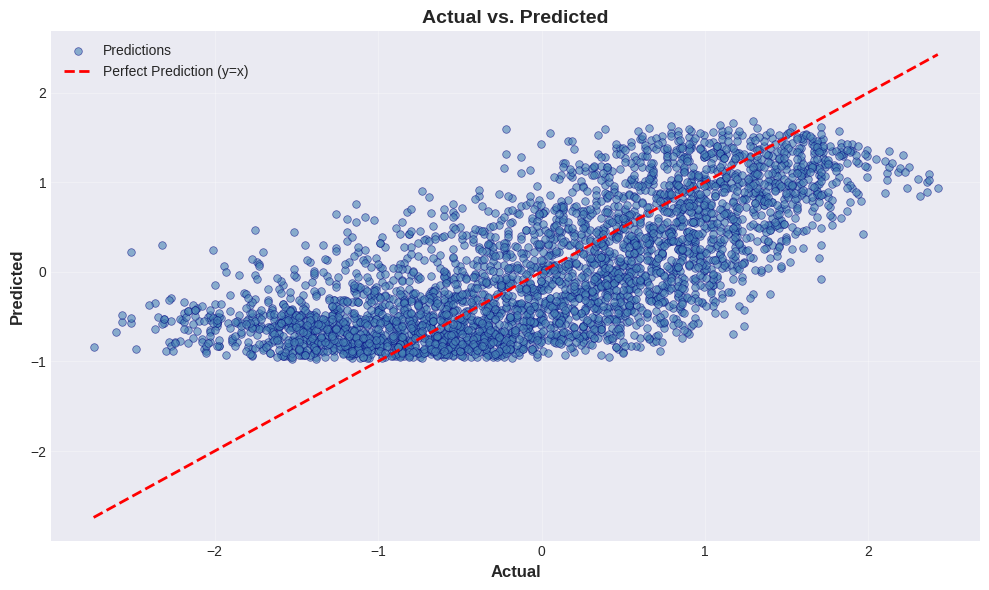

Plot 5: Actual vs Predicted Values

Interpretation: This scatter plot compares actual temperature values with
predicted values from the regression model.
The diagonal orange dashed line represents perfect predictions (actual = predicted).
Points closer to this line indicate better predictions.
Systematic deviations suggest the model may be biased or missing patterns.


In [9]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, s=30, color='steelblue', edgecolors='navy', linewidth=0.5, label='Predictions')

# Add perfect prediction line (y = x)
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction (y=x)')

plt.xlabel('Actual', fontsize=12, fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontweight='bold')
plt.title('Actual vs. Predicted', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Plot 5: Actual vs Predicted Values")
print(f"\nInterpretation: This scatter plot compares actual temperature values with")
print(f"predicted values from the regression model.")
print(f"The diagonal orange dashed line represents perfect predictions (actual = predicted).")
print(f"Points closer to this line indicate better predictions.")
print(f"Systematic deviations suggest the model may be biased or missing patterns.")

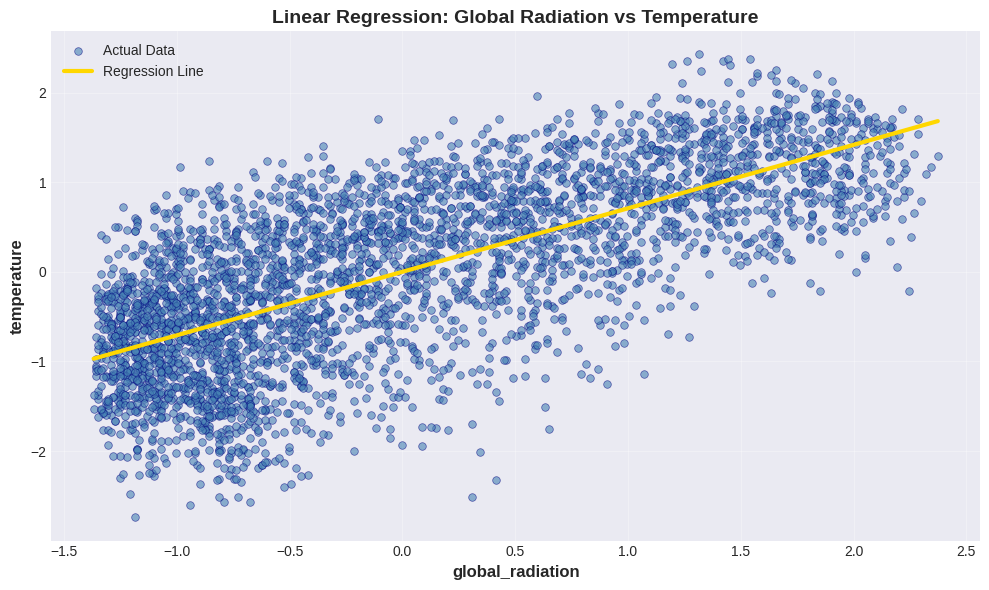

Plot 6: Regression Line on Original Data

Interpretation: This plot shows how well the linear regression model
fits the actual data. The gold line is the fitted regression line that minimizes
the sum of squared residuals. A good fit means most points cluster near the line.


In [10]:
# Plot regression line on original data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, s=30, color='steelblue', edgecolors='navy', linewidth=0.5, label='Actual Data')

# Add regression line
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)
plt.plot(X_line, y_line, color='gold', linewidth=3, label='Regression Line')

plt.xlabel('global_radiation', fontsize=12, fontweight='bold')
plt.ylabel('temperature', fontsize=12, fontweight='bold')
plt.title('Linear Regression: Global Radiation vs Temperature', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Plot 6: Regression Line on Original Data")
print(f"\nInterpretation: This plot shows how well the linear regression model")
print(f"fits the actual data. The gold line is the fitted regression line that minimizes")
print(f"the sum of squared residuals. A good fit means most points cluster near the line.")